# Mall customer segmentation using several clustering algorithms


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
col_name = ["CustID", "Age", "Gender", "Income", "SpendScore"]

In [3]:
df = pd.read_csv("C:/Users/Otinwa Ayomide/Downloads/ML project/archive (9)/Shopping Mall Customer Segmentation Data .csv", names = col_name)
df.head()

,CustID,Age,Gender,Income,SpendScore
0,Customer ID,Age,Gender,Annual Income,Spending Score
1,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
2,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
3,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
4,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57


In [4]:
df.drop("CustID", axis = 1, inplace = True)
df.drop(index = 0, inplace = True)

In [5]:
df.head()

,Age,Gender,Income,SpendScore
1,30,Male,151479,89
2,58,Female,185088,95
3,62,Female,70912,76
4,23,Male,55460,57
5,24,Male,153752,76


In [6]:
df.shape

(15079, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 1 to 15079
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         15079 non-null  object
 1   Gender      15079 non-null  object
 2   Income      15079 non-null  object
 3   SpendScore  15079 non-null  object
dtypes: object(4)
memory usage: 471.3+ KB


In [8]:
df.describe()

,Age,Gender,Income,SpendScore
count,15079,15079,15079,15079
unique,73,2,14441,100
top,86,Male,49997,59
freq,249,7595,3,175


In [9]:
df.isnull().sum()

Age           0
Gender        0
Income        0
SpendScore    0
dtype: int64

In [10]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female" : 1})

In [11]:
df = df.astype(int)

In [12]:
df.head()

,Age,Gender,Income,SpendScore
1,30,0,151479,89
2,58,1,185088,95
3,62,1,70912,76
4,23,0,55460,57
5,24,0,153752,76


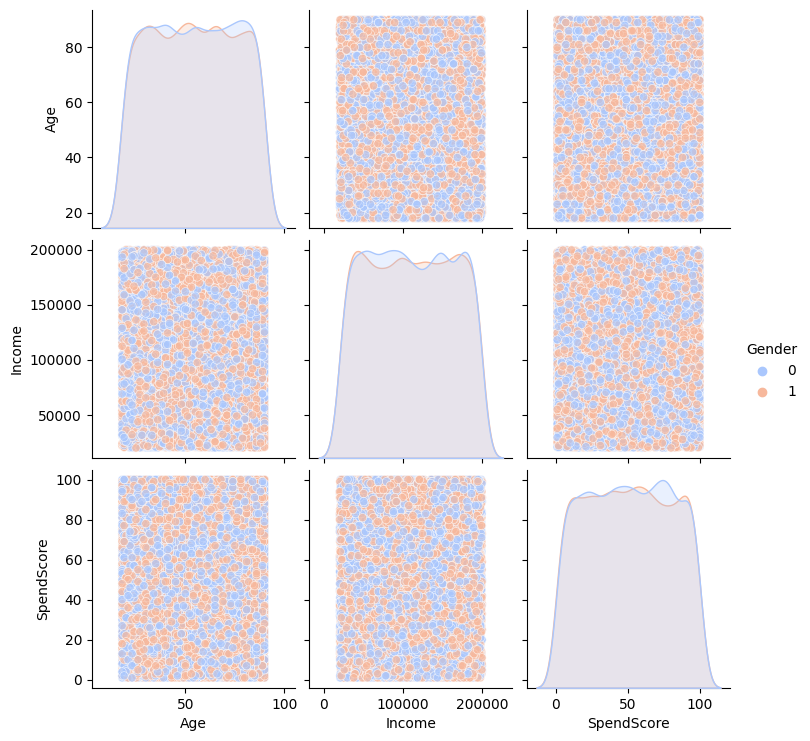

In [13]:
sns.pairplot(df, hue='Gender', palette='coolwarm', plot_kws={'alpha': 0.7})
plt.show()


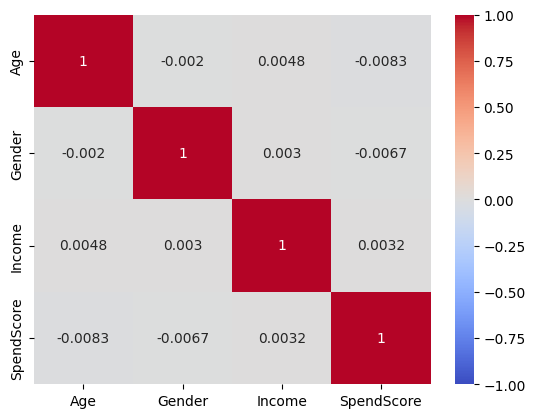

In [14]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

# KMeans Clustering

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [17]:
df_scaled

array([[-1.14551615, -0.99266566,  0.79881267,  1.33705873],
       [ 0.18033514,  1.00738853,  1.44207552,  1.54592857],
       [ 0.36974247,  1.00738853, -0.74320756,  0.88450743],
       ...,
       [-1.71373813,  1.00738853,  0.04965041, -0.09021845],
       [-1.33492347,  1.00738853, -0.2953409 , -1.58711891],
       [-1.6663863 , -0.99266566, -0.60668478, -1.69155383]])

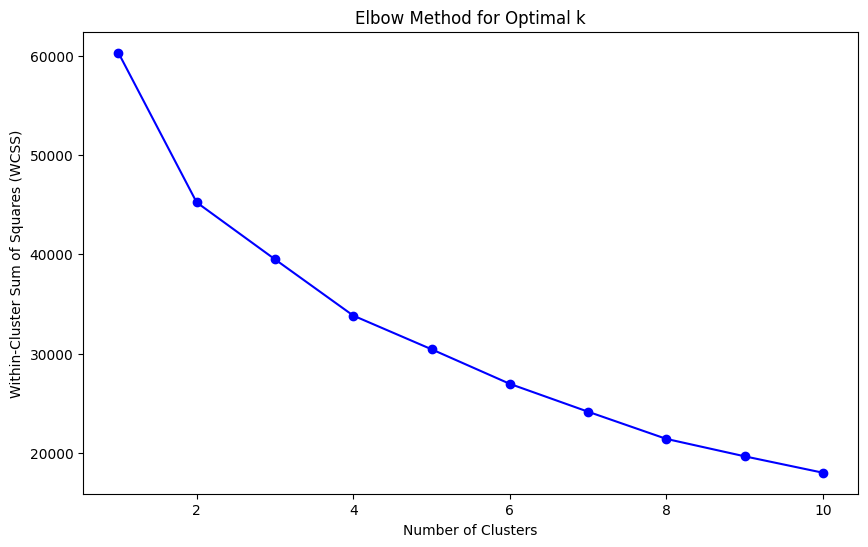

In [18]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

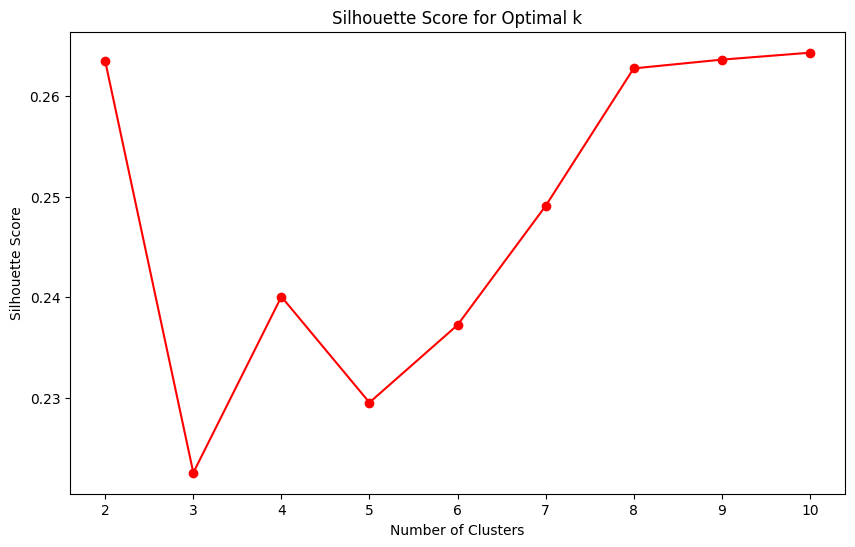

In [19]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=2, random_state=42)
df["clusters"] = kmeans.fit_predict(df_scaled)

In [21]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

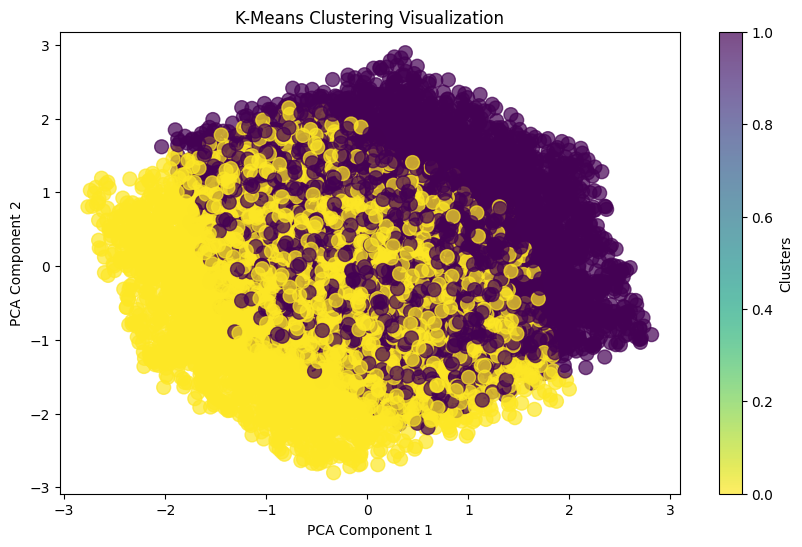

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['clusters'], cmap='viridis_r', s=100, alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization')
plt.colorbar(label='Clusters')
plt.show()

# DBSCAN CLUSTERING


In [24]:
from sklearn.cluster import DBSCAN

In [35]:
df_db = df.iloc[:,:-1]
df_db

,Age,Gender,Income,SpendScore
1,30,0,151479,89
2,58,1,185088,95
3,62,1,70912,76
4,23,0,55460,57
5,24,0,153752,76
...,...,...,...,...
15075,29,1,97723,30
15076,22,0,73361,74
15077,18,1,112337,48
15078,26,1,94312,5


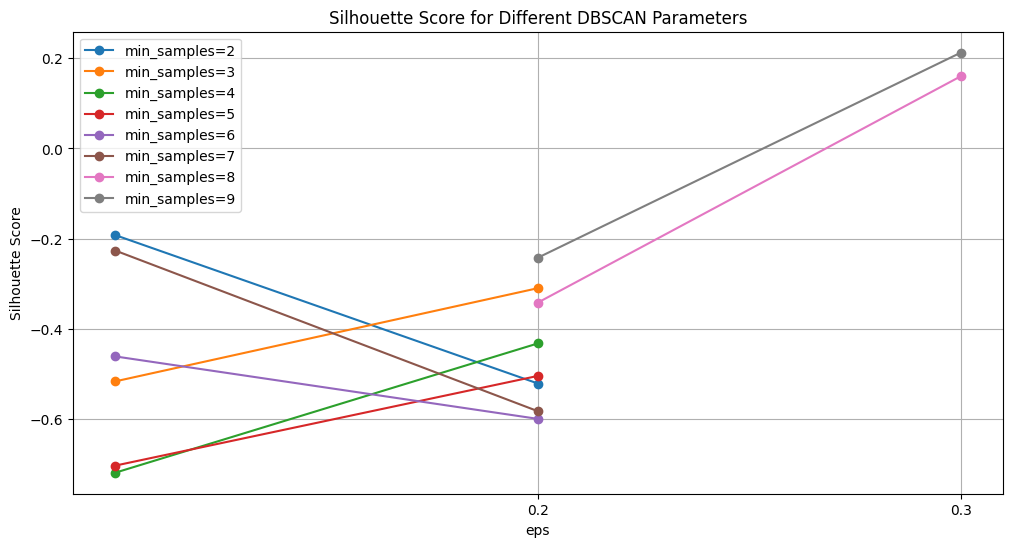

In [43]:
eps_values = np.arange(0.1, 1.1, 0.1)
min_samples_values = range(2, 10)

results = []

# Evaluate DBSCAN for different parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_scaled)
        
        # Skip if all points are classified as noise
        if len(set(clusters)) > 1 and -1 in clusters:
            score = silhouette_score(df_scaled, clusters)
            results.append((eps, min_samples, score))

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'silhouette_score'])


plt.figure(figsize=(12, 6))
for min_samples in min_samples_values:
    subset = results_df[results_df['min_samples'] == min_samples]
    plt.plot(subset['eps'], subset['silhouette_score'], marker='o', label=f'min_samples={min_samples}')

plt.title('Silhouette Score for Different DBSCAN Parameters')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.xticks(subset['eps'])
plt.legend()
plt.grid()
plt.show()

In [37]:
dbscan = DBSCAN(eps=0.5, min_samples=9)
df_db["db_clusters"] = dbscan.fit_predict(df_scaled)

In [38]:
df_db

,Age,Gender,Income,SpendScore,db_clusters
1,30,0,151479,89,0
2,58,1,185088,95,1
3,62,1,70912,76,1
4,23,0,55460,57,0
5,24,0,153752,76,0
...,...,...,...,...,...
15075,29,1,97723,30,1
15076,22,0,73361,74,0
15077,18,1,112337,48,1
15078,26,1,94312,5,1


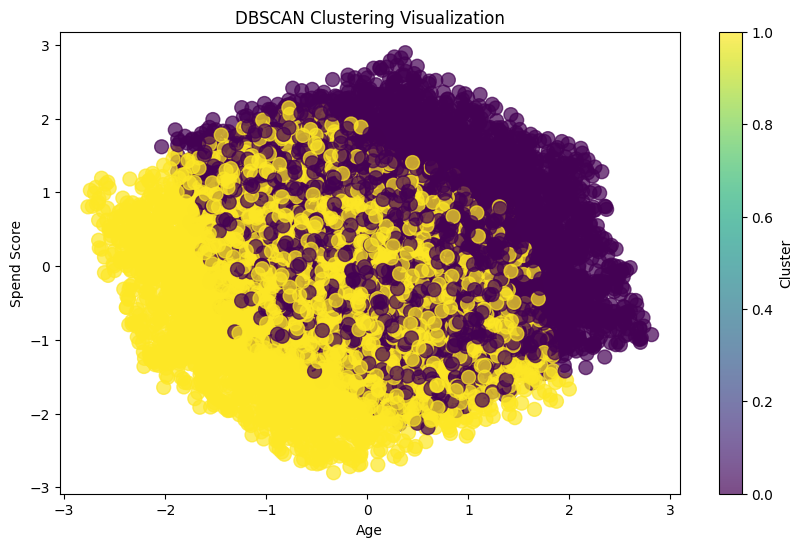

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_db['db_clusters'], cmap='viridis', s=100, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Spend Score')
plt.title('DBSCAN Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()